# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict high risk asthmatic patients. 

<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>Python Programming</li>
    <li>Data Cleaning</li>
    <li>Descriptive Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Logistic Regression</li>
    <li>Machine Learning</li>
</details><br>

Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 

<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 35%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" style="float: left; width: 25%; margin-left: 2%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 5%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're a risk manager at the Blue Cross Blue Shield (a large health insurance organization). Over the last winter, reports show that the number of asthma cases increased. You're dismayed to discover that this has led to an increase in deaths and costs among these patients as well. It's critical that a targeted intervention is developed to lower mortality and cost among these patients but first you must identify high-risk patients. How can you do this?

Continue through the case to find out. 

### Clinical Background: Asthma

Asthma is a respiratory disease which causes constriction and inflammation of the airways in the lungs. The disease can often cause acute airway constrictions sometimes known as “asthma attacks.” Clinicians refer to this airway restriction as “bronchospasm” and it results in cough, wheezing, shortness of breath, and extreme situations such as death from respiratory arrest. Currently, approximately 10 people die from asthma attacks per day in the US.

<p align="center">
  <img width="400" height="200" src="https://asthma.net/wp-content/uploads/2015/04/ASTHMATIC-AIRWAYS.jpg">
</p>


Asthma requires a test of lung function known as spirometry to make a definitive diagnosis. Treatment often consists of inhaled medications that help combat airway constriction and inflammation. Patients that do not get timely and appropriate treatment can need avoidable emergency care and hospitalizations. These visits can add thousands of dollars per year in avoidable medical expenses to the US healthcare system. The medical costs among patients with uncontrolled asthma are 3-times higher than controlled patients.

## Using Jupyter Notebook 

Before we begin the case, we need to know how to use Jupyter Notebook and run the case. First, look for the the `Run` button. The location of the `Run` button is shown below and can be found in the tool bar above. 

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png">

The cell below is a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above. 

In [ ]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')


<img width = 50 height = 50 style="float: left; margin-right: 10px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Stop_sign_dark_red.svg">Stop! If you have not learned to run a code cell, restart this section. You will not be able to go through the case at all if you are unable to run code cells. Otherwise, it's time to meet our data!

## Meeting Our Data

We'll be using the Medical Expenditure Panel Survey (MEPS) to predict Asthma Expenditure. Identifying an appropriate data source is critical in Analytics. Without the right dataset, your analysis is doomed from the start. 

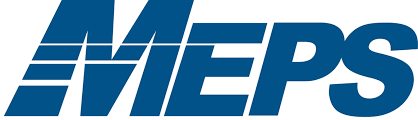

### What is MEPS?

MEPS is a national survey that seeks to capture as much data as possible about healthcare costs and use within the United States. Below is a detailed definition. 

> The Medical Expenditure Panel Survey (MEPS) is a set of large-scale surveys of families and individuals, their medical providers, and employers across the United States. MEPS is the most complete source of data on the cost and use of health care and health insurance coverage. - [meps.ahrq.gov](https://meps.ahrq.gov/mepsweb/)

MEPS contains over 2000 variables, detailed expenditure data, and comprehensive medical information. In other words, it has all the ingredients to build our prediction model!


### Necessary Data Files

<p style="text-align: center;">h128.csv</p>

***
Contains data on medical conditions for 2009 MEPS samples

<p style="text-align: center;">h129.csv</p>

***
Contains main information for 2009 MEPS samples, information includes survey data, demographics, and expenditure data

Both data files will already be downloaded as part of our case. They can also be accessed directly from the MEPS website. 'h128' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-128). 'h129' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-129)

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [1]:
# Calling external libraries for additional functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.api.types import CategoricalDtype 
plt.style.use('fivethirtyeight')
# Increase max number of columns displayed in output tables
pd.set_option("display.max_columns",2000)
# Make sure your ML results are the same
random.seed(10)
print('Setup complete!')

Setup complete!


# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that commonly overlooked within data science projects. However, without properly processed data, it won't matter how sophisticated our analysis is. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll read in our data so we can clean and use it. 

In [ ]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
print('Data loading, please wait')
condition=pd.read_csv("data/h128.csv",  encoding="UTF-8", sep=",")
consolidation=pd.read_csv("data/h129.csv",  encoding="UTF-8", sep=",")
print('Data loaded!')

## Selecting Asthmatic Patients

The MEPS data contains individuals with numerous conditions. We need to select only those individuals with asthma. We will identify these patients based on their International Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

First, let's see how many total observations there are to establish a baseline.

In [ ]:
# Display the total number of data instances
print("The number of entire data instances are:", condition.shape[0])

It looks like there are 117342 total observations. Now let's select only asthmatic patients from those observations. We will identify these patients based on their international Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

In [ ]:
# Select data instances related to asthma (493)
condition=condition.loc[condition['ICD9CODX']=='493']
print('Data selected')

Now let's remove duplicates and check how many observations are now in the dataset.

In [ ]:
# Removing duplicates
condition=condition.drop_duplicates(subset='DUPERSID')

# Show the number of selected data instances
print("The number of selected data instances are:", condition.shape[0],"\n")

We've gone from 117342 to 2375 observations!

### More About ICD Codes

ICD was created to promote international comparability in the collection, processing, classification, and presentation of mortality statistics. Each code is supposed to uniquely describe a particular diagnosis in detail. For instance, asthma has an ICD-9 code of 493. The latest iteration of ICD is actually ICD-11. ICD codes are used for a wide variety of task including processing health insurance claims, tracking disease epidemics, and compiling worldwide mortality statistics. ICD codes are used everywhere within the United States ranging from the smallest clinics to large government health agencies. They are essential to healthcare in the United States and many places worldwide. Below are some ICD code exsamples. 

<img src="https://www.miramedgs.com/images/TheCodeMay2015Chart3.2.png">

## Merging the Data

Next, we need to combine our data. Remember, our data was originally from two files (`h128` and `h129`). `h128` contains medical information about each patient. It's the data we used to select asthmatic patients. `h129` contains the main information we are interested in including survey data, demographics, and expenditure. We will combine both our data tables into one single table. This will make it much simpler to analyze the data.  

In [ ]:
# Merging the data
aggregation=consolidation.merge(condition)
print('Data merged!')

Let's confirm our data was successfully merged

In [ ]:
# Display the first few rows of the data
print('Displaying first few rows of merged data:\n')
aggregation.head()

### What Just Happened?

We just combined our two data tables in a process known as a merge. In a merge, the datasets you seek to merge should have one or more common variables between them. The data is then joined by this variable with accompanying values for variables specified with information specified by all datasets in one table. 
<img src="http://www.datasciencemadesimple.com/wp-content/uploads/2017/04/column-binding.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">
The data was joined based on a field named `DUPERSID`. This variable is simply an ID for each of the observations.

## Removing Extraneous Variables

Now we will drop the variables that are not relevant to our analysis. Normally, variable selection is a careful process informed by clinical/domain knowledge. For the purpose of this case, variable selection has been done for you. We will explore variable selection in more detail in Section 4: Identifying Relevant Variables. 

Let's examine the number of variables before variable selection. 

In [ ]:
# Drop variables that are not important for our analysis.
print("The number of variables before selecting are:", aggregation.shape[1])
print("Displaying the the first few rows of the data:\n")
aggregation.head()

Our data contains 1937 variables! Lets see how many remain after variable selection. 

In [ ]:
# The following variables are the names of variables that are relevant.
asthma_variables = ["ASACUT53", "ASMRCN53", "ASPKFL53", "ASPREV53", "ASTHAGED", "ASTHDX", "ASTHEP53",
                      "ASWNFL53", "ADSMOK42", "ASPRIN53", "CHBRON53", "EMPHAGED", "EMPHDX" ]

general_variables = ["ADAPPT42", "ADEGMC42", "ADEXPL42", "ADHECR42", "ADNSMK42", "ADPRTM42", "AGE09X", "BLIND42",
                       "BMINDX53", "CHAPPT42", "CHBMIX42",  "CHECK53", "DSFL0853", "DSFL0953", "DSFLNV53", "EXRCIS53", 
                       "PHYSCL42", "FAMINC09", "INS09X", "INSCOV09", "UNINS09", "OCCCAT53", "PERWT09F", "PMDLAY42", 
                       "PMUNAB42", "PMUNPR42","PMUNRS42", "POVLEV09", "RACETHNX", "REGION09", "RTHLTH53", "SEX", 
                       "SPOUIN09", "TOTEXP09", "TTLP09X", "UNABLE53", "WKINBD53", "WLKDIF53", "WLKLIM53" ]

essential_variables = ["DUPERSID","CONDIDX"]

all_variables =essential_variables+asthma_variables+general_variables

## Select variables
aggregation = aggregation[all_variables]

print("The number of variables after selecting are:", aggregation.shape[1])

# Display first few rows
print("Displaying the the first few rows of the data:")
aggregation.head()

We now have only 54 variables! This is a much more manageable amount. 

## Creating Our New Dataset

Finally, we need to create a file of newly cleaned data

In [ ]:
# Create a new file with the cleaned data
aggregation.to_csv('data/aggregation.csv',index=False)
print('File Created!')

With our cleaned dataset, we can now explore our data more deeply. In the next section, we will be investigating how we can identify clinically relevant variables for building our prediction model using descriptive analysis and data visualization. 

# Exploratory Data Analysis

To build a robust prediction model, we need to identify clinically relevant variables (also known as 'features'). In this section, we'll be identifying important features through a combination of clinical knowledge, descriptive analysis, and data visualization. We'll be demonstrating these concepts through exploring how aspirin usage impacts health expenditure among asthma patients. 

### Why Can't We Just Use More Variables?

One issue you might be wondering about is why we even need to select variables. Why not just use all of the variables? After all, more data lead to better models, right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, it is where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Reading Our New Data

To begin, we'll need to read our new data file created during the data cleaning process titled 'aggregation.csv'. 

In [ ]:
# Reading our data file
print('Data loading, please wait')
aggregation = pd.read_csv("data/aggregation.csv",  encoding="UTF-8", sep=",")
print('Data loaded!')

Let's confirm our loaded data is correct. It's good practice to check your data throughout an analysis. 

In [ ]:
# Display the first few rows of the data
print("Displaying the the first few rows of the data:")
aggregation.head()

## Why Aspirin?

Why are we even looking at aspirin in the first place? This is because of Aspirin Exacerbated Respiratory Disease (AERD), which is a disease associated with asthma patients who take aspirin. Since this condition is more common among aspirin-taking asthma patients compared to non-aspirin-taking asthma patients, we expect costs to be higher among patients who take aspirin. The variable which details aspirin usage is `ASPRIN53`.

> Note: This is an example of why clinical or domain knowledge is so important. Having this information about aspirin allowed us to hone in on this variable from nearly 2000 total. Can you imagine how inefficient it would be if you had to search through every variable individually?

Let’s begin by examining the distribution for the aspirin variable. 

In [ ]:
# See the distribution of aspirin usage
aggregation.ASPRIN53.value_counts()

We can see the current data labels are not very informative. Figuring out how variables are specified or 'coded' is commonly solved through consulting documentation and accompanies datasets. 

 From the [MEPS website](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H129&varName=ASPRIN53) we can see what each of the labels represent. Most useful for our purpose are the labels listed below:
- 1 = Yes (to take aspirin every other day)
- 2 = No (to take aspirin every other day)

Lets take this information and code the data in a more meaningful way. 

In [ ]:
# Recode Data
aggregation.loc[aggregation.ASPRIN53 == 1, 'aspirin_use']='Use Aspirin'
aggregation.loc[aggregation.ASPRIN53 == 2, 'aspirin_use']='No Aspirin'

We will now randomly sample 250 individuals from each of our subsetted data. This will allow us to make an equitable comparison between the two groups when we compare their distributions. 

In [ ]:
# Subset Aspirin Usage
aspirin_sample=aggregation[(aggregation.ASPRIN53==1) | (aggregation.ASPRIN53==2)]
aspirin_sample.shape

# Sample 250 for each group
# Seeding so we obtain the same outcome when we randomly sample
first_part=aspirin_sample[aspirin_sample.ASPRIN53==1].sample(n=250,random_state=30)
second_part=aspirin_sample[aspirin_sample.ASPRIN53==2].sample(n=250,random_state=20)
aspirin_sample=pd.concat([first_part,second_part])
print(aspirin_sample.aspirin_use.value_counts())
print('Data Sampled Succesfully')


The two cells below will return the annual healthcare expenditure for each randomly sampled individual for both of our subsets. 

In [ ]:
print(aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use=='Use Aspirin'])

In [ ]:
print(aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'No Aspirin'])

Not very easy to compare or see patterns, is it? This is where we will employ descriptive analysis and data visualization to make sense of this information. 

### Additional Information About AERD

Aspirin Exacerbated Respiratory Disease (AERD) is a medical condition consisting of three
key features: asthma, chronic/recurrent rhinosinusitis (inflammations of sinuses and nasal cavity), and
nasal polyps. The symptoms are a result of an abnormal reaction from the body's immune system,
known as a hypersensitivity reaction, to aspirin. The disorder is thought to be caused by an anomaly in the metabolism of a substance known as arachidonic acid. Medications, such as aspirin, block the COX-1 enzyme, a critical enzyme involved in arachidonic acid metabolism. This leads to increased production of proinflammatory cysteinyl leukotrienes, a series of chemicals involved in the body's inflammatory response. This resulting overproduction causes severe exacerbations of asthma and allergy-like symptoms.

<img src="https://naveenbhandarkarmd.com/wp-content/uploads/2018/08/Aspirin-Exacerbated-Respiratory-Disease-Dr.-Naveen-Bhandarkar-1.jpg" align="center" style="width: 30%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Aspirin Expenditure Summary Statistics

Let's take a look at some summary statistics of the aspirin-taking group. 

> Note: the below figures express annual expenditure in dollars per person

In [ ]:
print("Mean:", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'Use Aspirin'].mean())
print("SD", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'Use Aspirin'].std()) 
print("Median", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'Use Aspirin'].median())
print("IQR:", scipy.stats.iqr(aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'Use Aspirin']))

Le'ts take a look at some summary statistics of the non-aspirin-taking group. 

In [ ]:
print("Mean:", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'No Aspirin'].mean())
print("SD", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'No Aspirin'].std())
print("Median", aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'No Aspirin'].median())
print("IQR:", scipy.stats.iqr(aspirin_sample.TOTEXP09[aspirin_sample.aspirin_use == 'No Aspirin']))

Already, we can see that the mean and median annual expenditure is higher in the aspirin-taking group. We can also visually capture the difference using data visualization. 

**Food For Thought:** When should you use median compared to mean?

When your data falls in a normal distribution, it is better to use the mean. However, if your data includes extreme values or is skewed, it is better to use the median. 

<img src="https://keydifferences.com/wp-content/uploads/2016/04/mean-vs-median.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

## Visualizing Aspirin Costs With A Histogram

We can compare the shapes of the distributions for each group using a histogram. Below is the histogram for the aspirin-taking sample. 

In [ ]:
# create the histogram
plt.figure(figsize=(10,10))
plt.hist(aspirin_sample[aspirin_sample.aspirin_use == 'No Aspirin'].TOTEXP09,bins=20,alpha=0.5, label='No Aspirin')
plt.hist(aspirin_sample[aspirin_sample.aspirin_use == 'Use Aspirin'].TOTEXP09, bins=20,alpha=0.5, label='Use Aspirin')
plt.legend()
plt.xlabel('Annual Healthcare Expenditure')
plt.ylabel('Frequency Count')
plt.xlim(0,80000)
plt.show()

We can see a difference between the groups. However, it's hard to tell the differences between the two groups due to the x-axis scale. Let's zoom into the first portion of the chart (0 - 40,000) and add reference line (representing mean or median). 

Is the plot for the two histograms normal or skewed? Should we use median or mean then?

The two plots are positively skewed. This indicates that using median would be better compared to mean. If you're unsure why, please review section 4.3

In [ ]:
# Create Median Line
plt.figure(figsize=(10,10))
plt.hist(aspirin_sample[aspirin_sample.aspirin_use == 'No Aspirin'].TOTEXP09,bins=40,alpha=0.5, label='No Aspirin')
plt.hist(aspirin_sample[aspirin_sample.aspirin_use == 'Use Aspirin'].TOTEXP09, bins=40,alpha=0.5, label='Use Aspirin')
plt.axvline(aspirin_sample[aspirin_sample.aspirin_use=='No Aspirin'].TOTEXP09.median(), color='#00BFC4',linestyle='dashed',label='Median:No Aspirin')
plt.axvline(aspirin_sample[aspirin_sample.aspirin_use=='Use Aspirin'].TOTEXP09.median(), color='#F8766D',linestyle='dashed',label='Median:Use Aspirin')
plt.legend()
plt.xlabel('Annual Healthcare Expenditure')
plt.ylabel('Frequency Count')
plt.xlim(0,40000)
plt.show()

Much better! Our histogram now shows a clear difference in distribution between the two samples. We can see that the distribution of the group that takes aspirin skews right towards higher annual expenditures.

### Why are the frequency counts lower in the second histogram?

You may have noticed the frequency counts are lower in the 2nd histogram compared to the first. This is due to the fact that histogram are heavily influenced by the number of bins (bars) displayed. Did our data change? It actually did not. This surprisingly large effect was only from focusing on a smaller range of health care expenditures. Keep this in mind when interpreting and using histograms!

<img src="https://statistics.laerd.com/statistical-guides/img/histogram-4.png" style="width: 80%; margin-bottom: 0.5em;">


## Visualizing Aspirin Costs With A Boxplot

We can also visually compare the difference in the shapes of the distribution using a box plot. Additional information about interpreting a boxplot can be found in section 4.5.1.

In [ ]:
# Setting up the plot
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="aspirin_use", y="TOTEXP09", data=aspirin_sample)
plt.xlabel('Aspirin Usage')
plt.ylabel('Annual Healthcare Expenditure')

The main box is very difficult to see due to the large number of points along the tail of each plot. Lets visualize the graph without some of these tail points to better compare the two boxes. 

In [ ]:
# Setting up the plot
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="aspirin_use", y="TOTEXP09", data=aspirin_sample[aspirin_sample.TOTEXP09<40000])
plt.xlabel('Aspirin Usage')
plt.ylabel('Annual Healthcare Expenditure')

There seems to be a clear difference in cost between the two group. This confirms our clinical suspicion that AERD would increased costs. This observed difference also makes this a good candidate feature (variable) for our prediction model. This is simply one demonstration of how to identify clinically relevant variables for a prediction model!

### How To Interpret A Boxplot

The boxplot divides data into division known as quartiles. The first quartile (Q1) corresponds to the 25th percentile of the data. The second quartile (Q2) corresponds to the 50th percentile of the data. This is also the median. The third quartile (Q3) corresponds to the 75 percentile of the data. The lines on the box represent Q1, the median, and Q3. The tails or 'whiskers' of the plots represent 1.5 * IQR below the Q1 and above the Q3. 

<img src="https://miro.medium.com/max/1200/1*2c21SkzJMf3frPXPAR_gZA.png" align="center" style="width: 70%; margin-bottom: 0.5em; margin-top: 0.5em;">

In this exercise, we've seen how descriptive analysis can aid us in identifying useful variables for building a prediction model. An important takeaway from this exercise is seeing how clinical knowledge can inform our data analysis. In our case, having an understanding of the pathophysiology of aspirin and asthma allows us to identify a variable that can lead to higher expenditure from more than 2000 variables. 

# Building A Predictive Model

We now arrive at building our prediction model. We will be employing logistic regression to conduct a statistical analysis followed by employing machine learning to construct a prediction model. At the end, our goal is to have a product that can identify high-risk/high-cost asthma patients!

## Reading In Our Data

Once again, we read in our data. We will be using our created file from Section 3: 'Cleaning our Data'

In [2]:
# Reading our data
print('Data loading, please wait')
aggregation =pd.read_csv('data/aggregation.csv',  encoding="UTF-8",sep=",")
print('Data loaded!')

Data loading, please wait
Data loaded!


Now let's confirm our data has been loaded correctly

In [3]:
# Display the first few rows of the data
print("Displaying the the first few rows of the data:\n")
aggregation.head()

Displaying the the first few rows of the data:



,DUPERSID,REGION09,AGE09X,SEX,RACETHNX,SPOUIN09,RTHLTH53,EMPHDX,EMPHAGED,CHBRON53,ASTHDX,ASTHAGED,ASTHEP53,ASACUT53,ASMRCN53,ASPREV53,ASPKFL53,ASWNFL53,WLKLIM53,WLKDIF53,UNABLE53,BLIND42,CHAPPT42,CHBMIX42,PHYSCL42,CHECK53,EXRCIS53,ASPRIN53,BMINDX53,ADAPPT42,ADEGMC42,ADEXPL42,ADPRTM42,ADHECR42,ADSMOK42,ADNSMK42,DSFL0953,DSFL0853,DSFLNV53,WKINBD53,PMUNAB42,PMUNRS42,PMUNPR42,PMDLAY42,OCCCAT53,TTLP09X,FAMINC09,POVLEV09,UNINS09,INSCOV09,INS09X,TOTEXP09,PERWT09F,CONDIDX
0,40001101,2,28,1,4,1,2,2,-1,2,1,15,1,1,2,1,2,-1,2,-1,-1,-1,-1,-1.0,-1,6,2,2,26.6,3,4,4,4,10,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,48500,121000,700.72,2,1,1,1173,14251.111105,400011010011
1,40001103,2,2,1,4,3,2,-1,-1,-1,1,0,1,1,2,2,2,-1,2,-1,-1,-1,5,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,0,121000,700.72,2,1,1,3215,14803.089514,400011030011
2,40044101,2,79,1,4,2,4,1,76,1,1,65,-1,2,-1,2,2,-1,1,3,1,-1,-1,-1.0,-1,1,2,1,34.3,6,4,4,4,10,2,-1,1,1,2,-1,2,-1,-1,2,-1,49570,49570,481.77,2,1,1,14951,17739.800407,400441010101
3,40050101,2,41,1,4,1,2,2,-1,2,1,8,-1,1,2,1,1,3,2,-1,-1,-1,-1,-1.0,-1,1,1,2,31.7,1,4,4,4,8,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,199424,248131,1140.52,2,1,1,3791,10588.753294,400501010021
4,40052101,3,69,2,4,2,5,1,68,2,2,-1,-1,-1,-1,-1,-1,-1,1,4,1,2,-1,-1.0,-1,1,2,2,25.3,5,4,4,4,10,2,-1,2,2,2,-1,2,-1,-1,2,-1,0,11000,65.55,2,2,1,58604,4936.989686,400521010101


## Converting Variables Into Categorical Variables

**Pre-Check:** What is the difference between a quantitative and categorical variable?

>- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
>- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

Several of our variables are categorical variables but are mistakenly classified in Python as quantitative. This is due to their data label being numbers (ie. for `ASPRIN53` 1 = taking aspirin & 2 = not taking aspirin). The code below will convert these variable to be categorical variables. 

In [4]:
# Converting variables to categorical variable type
def change_category_type(features):
    for feature in features:
        aggregation[feature]=aggregation[feature].astype('category')

change_category_type(['REGION09','SEX','RACETHNX','SPOUIN09','RTHLTH53','EMPHDX','CHBRON53','ASTHDX','ASACUT53','ASMRCN53','ASPREV53',
                     'ASPKFL53','ASWNFL53','WLKLIM53','WLKDIF53','UNABLE53','BLIND42','PHYSCL42','EXRCIS53','ASPRIN53',
                     'ADEGMC42','ADEXPL42','ADPRTM42','ADSMOK42','ADNSMK42','DSFL0953','DSFL0853','DSFLNV53','PMUNAB42'
                     ,'PMUNRS42','PMUNPR42','PMDLAY42','OCCCAT53','UNINS09','INSCOV09','INS09X'])

### Why Is Classifying Variables Correctly Important?

Having a classifying variable as the correct data type is critical because certain statistical and analytical measurements can only be used for specific data types. For instance, we can graph quantitative data using a histogram but not categorical data. On the other hand, logistic regression can measure the outcome of a type of categorical variable known as a binary variable (ie. yes/no, high-risk/low-risk) but is unable to measure the outcome of quantitative variables. 

## Defining High- and Low- Risk Patients

Next, we need to define what a low-risk or high-risk patient is, so we can train our prediction model and evaluate its performance.

We will begin descriptively examining our data.

In [5]:
# Summary statistics for annual healthcare expenditure
aggregation.TOTEXP09.describe()

count      2375.000000
mean       7317.943158
std       16122.195303
min           0.000000
25%         601.000000
50%        2122.000000
75%        6825.000000
max      290987.000000
Name: TOTEXP09, dtype: float64

Text(0.5, 1.0, 'Histogram of Annual Medical Expenditure')

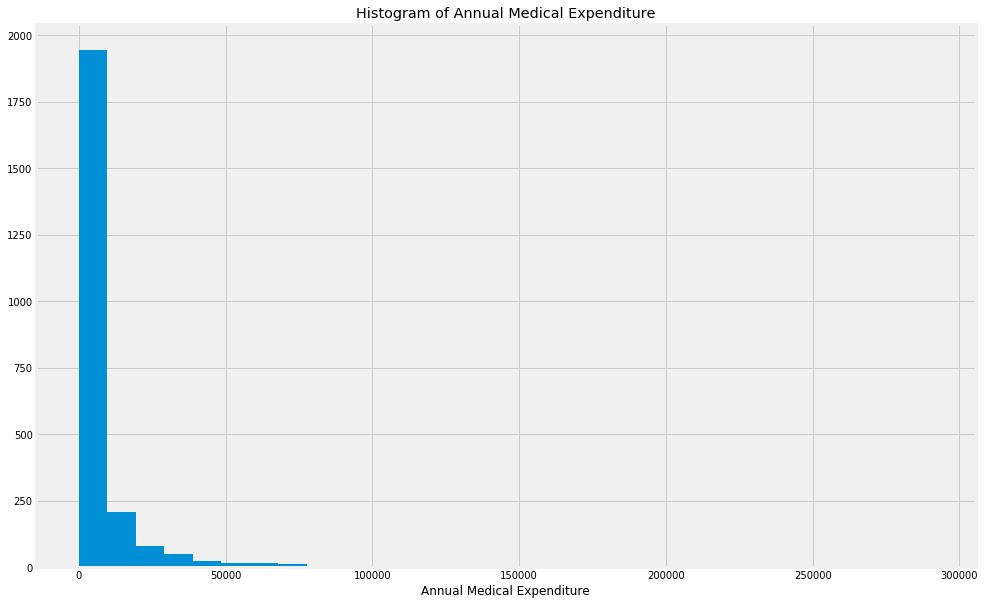

In [6]:
# Histogram of annual healthcare expenditure
plt.figure(figsize=(15,10))
plt.hist(aggregation.TOTEXP09,bins=30)
plt.xlabel('Annual Medical Expenditure')
plt.title('Histogram of Annual Medical Expenditure')

From our analysis, we can see that the distribution for annual medical expenditure is not a normal distribution. 

**Knowledge Check:** Based our distribution, should we use mean or median?

A non-normal distribution indicates that median would be a better measure of central tendency. 

The median provides us a useful measure for defining high- and low- risk. Since individuals above the median annual expenditure represent the larger 1/2 of expenditure values, we can classify these individuals as high-risk. Since individuals below the median annual expenditure represent the smaller 1/2 of expenditure values, we can classify these individuals as low-risk. In summary

**High-risk** patients are defined as those with annual medical expenditures **>= 2122**
<br>
**Low-risk** patients are defined as those with annual medical expenditures **<= 2122**

The below code will convert our expenditure into binary risk categories

<img align="left" width="100" height="100" src="https://cdn-01.media-brady.com/store/stus/media/catalog/product/cache/4/image/85e4522595efc69f496374d01ef2bf13/1544627174/r/e/reflective-warning-signs-caution-ac0563-lg.jpg" style="padding-right: 10px">If you run the below code more than once, please restart the exercise. Running it more than once will cause errors in our later prediction model. Do not run the code cell again after you see the 'Labeling complete' text!


In [7]:
# Labeling indviduals as high or low risk
aggregation.TOTEXP09=aggregation.TOTEXP09.apply(lambda x:'high_risk' if x >=2122 else 'low_risk')
print('Labeling complete!')

Labeling complete!


## Analyzing Our Data: Logistic Regression 

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcome (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

Our primary income is whether an individual is a high or low risk asthmatic individual. It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is high- or low-risk while controlling for other variables. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Let's say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it is more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is a less than 5% chance that the observed relationship in the data was due to chance alone.

By converting expenditure into 'high-risk' or 'low-risk', we've converted expenditure from a quantitative variable into a categorical variable. We now need to change the variable into 1 and 0 to represent a binary variable in Python.

In [8]:
# Labeling high risk indviduals as 1 and low risk individuals as 0
aggregation.TOTEXP09=aggregation.TOTEXP09.apply(lambda x:1 if x =='high_risk' else 0)

We can now create our logistic model. 

In [9]:
# Note: DUPERSID is a personal ID and CONDIDX is an independent variable. For these reasons, these variables were 
# not included in the model
# Independent features do not include TOTEX09 which is the dependent variable
aggregation_X=aggregation.drop(columns=['DUPERSID','TOTEXP09','CONDIDX'])
aggregation_Y=aggregation.TOTEXP09
aggregation_X=pd.get_dummies(aggregation_X)

In [10]:
# create a logistic model
model=sm.GLM(aggregation_Y,aggregation_X)
result=model.fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               TOTEXP09   No. Observations:                 2375
Model:                            GLM   Df Residuals:                     2245
Model Family:                Gaussian   Df Model:                          129
Link Function:               identity   Scale:                         0.16086
Method:                          IRLS   Log-Likelihood:                -1133.3
Date:                Wed, 04 Mar 2020   Deviance:                       361.12
Time:                        14:33:24   Pearson chi2:                     361.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
AGE09X          0.0043      0.001      4.911      0.000       0.003       0.006
EMPHAGED       -0.0014      0.002     -0.848      0.396      -0.005       0.002
ASTHAGED        0.0006      0.001      0.948      0.343      -0.001       0.002
ASTHEP53       -0.0065      0.007     -0.984      0.325      -0.019       0.006
CHAPPT42        0.0455      0.006      7.675      0.000       0.034       0.057
CHBMIX42        0.0012      0.001      1.071      0.284      -0.001       0.003
CHECK53        -0.0121      0.006     -1.919      0.055      -0.024       0.000
BMINDX53       -0.0001      0.001     -0.101      0.919      -0.003       0.002
ADAPPT42        0.0243      0.005      4.935      0.000       0.015       0.034
ADHECR42       -0.0069      0.006     -1.100      0.271      -0.019       0.005
WKINBD53        0.0031      0.002      1.994      0.046    5.28e-05       0.006
TTLP09X     -2.193e-07   6.27e-07     -0.350      0.726   -1.45e-06    1.01e-06
FAMINC09    -5.508e-07   5.21e-07     -1.057      0.291   -1.57e-06    4.71e-07
POVLEV09        0.0002      0.000      2.024      0.043       7e-06       0.000
PERWT09F     1.592e-06   1.66e-06      0.960      0.337   -1.66e-06    4.84e-06
REGION09_-1     0.0811      0.106      0.768      0.442      -0.126       0.288
REGION09_1      0.0322      0.030      1.069      0.285      -0.027       0.091
REGION09_2      0.0370      0.029      1.270      0.204      -0.020       0.094
REGION09_3     -0.0190      0.028     -0.672      0.501      -0.075       0.036
REGION09_4     -0.0445      0.029     -1.538      0.124      -0.101       0.012
SEX_1           0.0290      0.020      1.422      0.155      -0.011       0.069
SEX_2           0.0579      0.020      2.899      0.004       0.019       0.097
RACETHNX_1     -0.0025      0.021     -0.119      0.905      -0.043       0.038
RACETHNX_2      0.0131      0.021      0.634      0.526      -0.027       0.054
RACETHNX_3      0.0144      0.036      0.398      0.691      -0.056       0.085
RACETHNX_4      0.0619      0.020      3.078      0.002       0.022       0.101
SPOUIN09_1      0.0478      0.026      1.855      0.064      -0.003       0.098
SPOUIN09_2     -0.0081      0.021     -0.385      0.701      -0.049       0.033
SPOUIN09_3      0.0471      0.037      1.266      0.206      -0.026       0.120
RTHLTH53_-8     0.0087      0.350      0.025      0.980      -0.678       0.696
RTHLTH53_-1    -0.0181      0.230     -0.078      0.937      -0.469       0.433
RTHLTH53_1     -0.0730      0.078     -0.939      0.348      -0.225       0.079
RTHLTH53_2      0.0029      0.077      0.038      0.970      -0.148       0.153
RTHLTH53_3      0.0152      0.076      0.199      0.842      -0.134       0.165
RTHLTH53_4      0.0787      0.077      1.025      0.305      -0.072       0.229
RTHLTH53_5      0.0725      0.079      0.91

The above model allows us to see what variables are considred to have a statically significant effect on risk for high healthcare expenditure. For instance, `AGE09X`(age) has a statistically significant effect with a p-value extremely close to 0. Interestingly, `ASPRIN53`(aspirin) was not considered a statistically significant variable (p-value is greater than 0.05).

## Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analysis. What is Machine Learning?

In machine learning, data is split into a training set and a test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The model's predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data. 

In [12]:
# Split the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(aggregation_X, aggregation_Y, test_size=0.2, random_state=123)
print('The number of traning data observations:',X_train.shape[0])
print('The number of test data observations:',X_test.shape[0])

The number of traning data observations: 1900
The number of test data observations: 475


Now that we've created our training and test data, we need to build our machine learning model. 

In [13]:
# Build the model on training data
print('Training model, please be patient...')
lg=LogisticRegression()
lg.fit(X_train,y_train)
print('Model trained!')

Training model, please be patient...


/Users/IssacQI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model trained!


Now our model is trained and we need to apply it to the test data

In [14]:
# Apply the model to test data
y_pred=lg.predict(X_test)
print('Model successfully applied to test data!')

Model successfully applied to test data!


Finally we will generate what's called a confusion matrix. 

In [15]:
# Create Confusion matrix
confusion_matrix(y_test,y_pred)

array([[199,  36],
       [ 69, 171]])

In [16]:
# Create Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       235
           1       0.83      0.71      0.77       240

    accuracy                           0.78       475
   macro avg       0.78      0.78      0.78       475
weighted avg       0.78      0.78      0.78       475



Our model was able to correctly predict 77% of the time with a precision of 78% and a recall of 78%. 

One question you may be wondering is does our model perform well enough? That depends. That depends on the type of conditions or predictions we're making. That depends on whether alternative predictive models or tools exist and how our new model compares. Additional research or consideration should always be done consider whether a model's result is not only statistically significant, but **clinically significant**. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy:

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is recall:

\[\large TP / (TP + FN)\]

Recall asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually at high risk) how often will the model predict positively (ie. how often will the model then predict the patient to be at high risk). The final metric is precision:

\[\large TP / (TP + FP)\]

Precision asks the question, that when the model predicts positively (ie. in our case when the model predicts the patient to be at high risk) how often will the outcome be actually positive (ie. how often will our patient is actually at high risk). 

## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

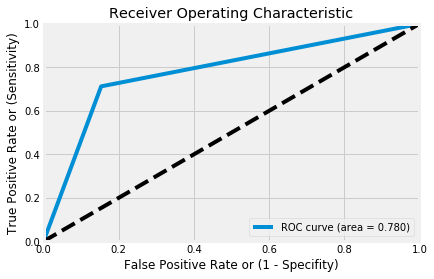

In [17]:
# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [18]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.78


The closer to the top left corner our ROC curve, the better. The higher our AUC value, the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

A ROC plots sensitivity (probability of predicting a real positive will be positive) against 1-specificity (the probability of predicting a real negative will be positive). A model with a 50-50 chance of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of the magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value. The higher the AUC value, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining the Model

An important part of any model is to explain it. We will be measuring the variable importance for our model. The higher the variable importance, the more important that variable for our model for predicting no shows.

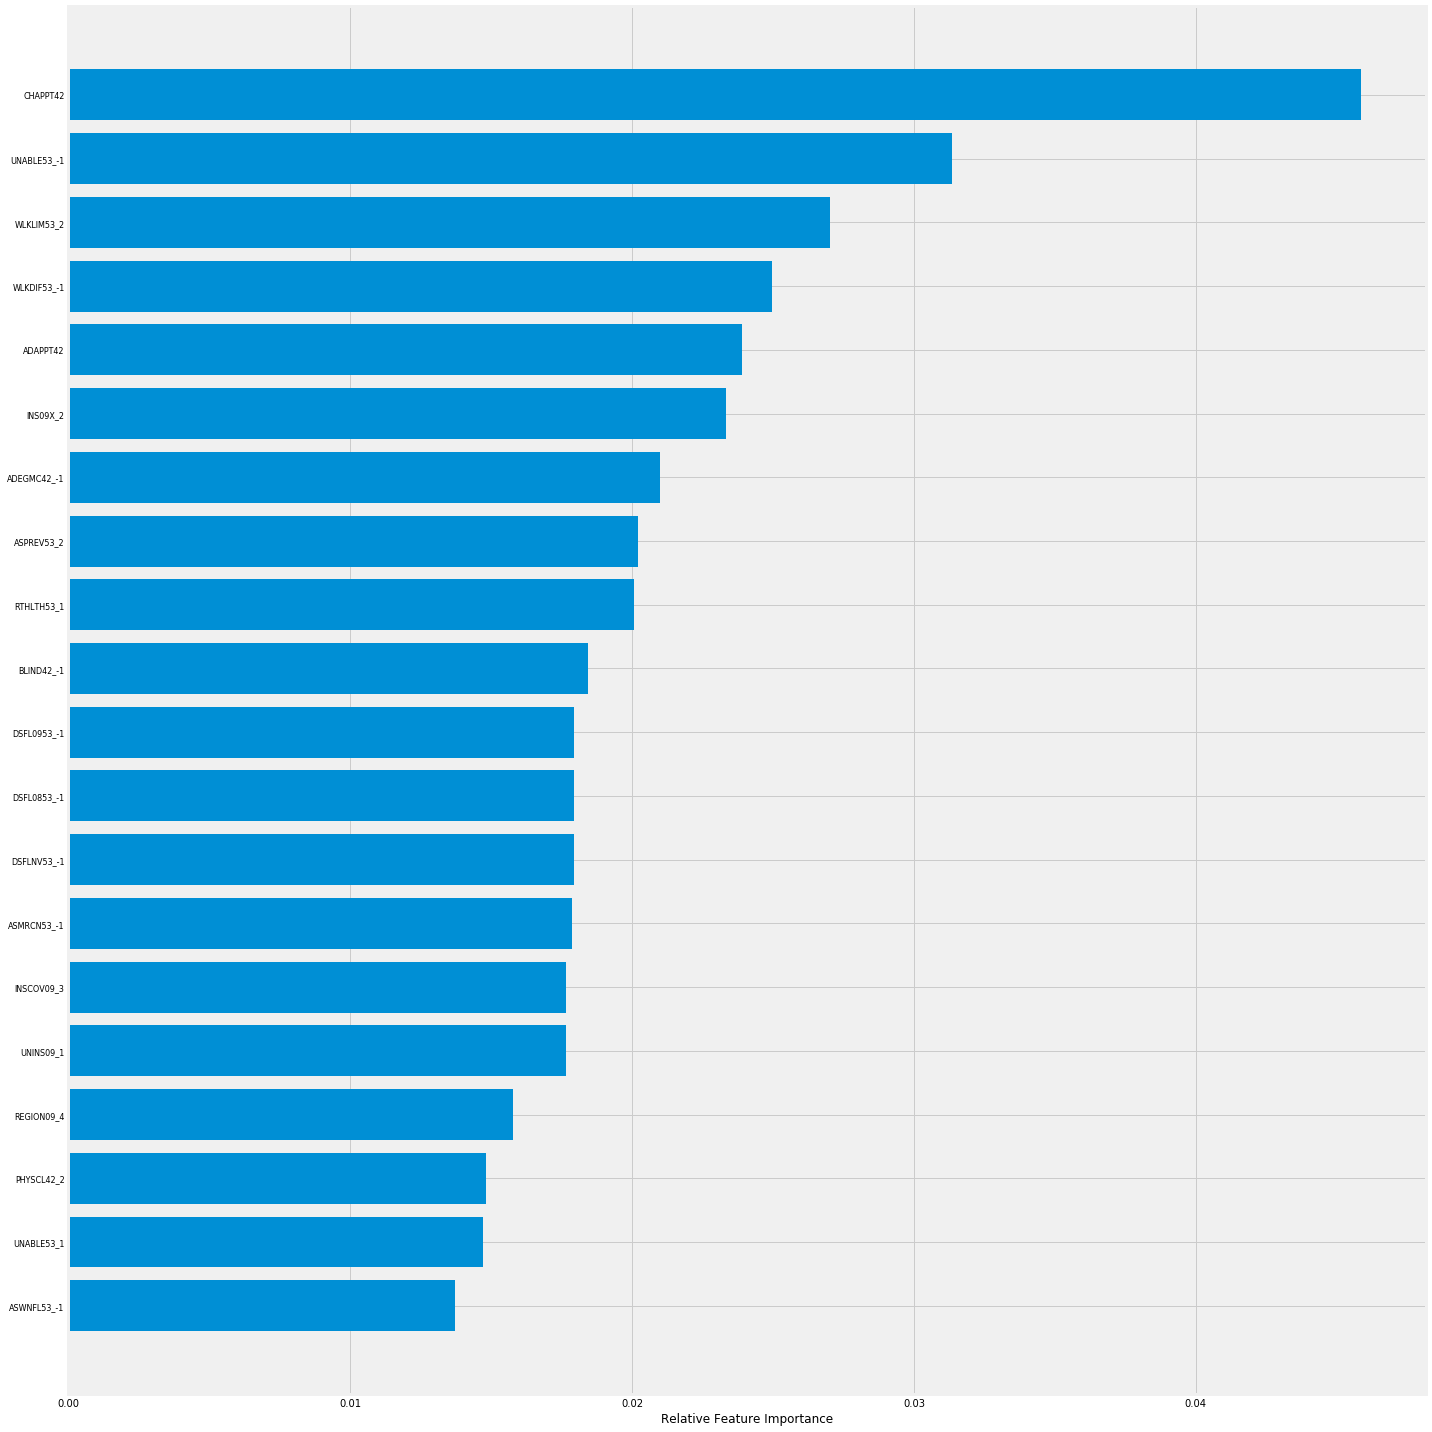

In [19]:
# top 20 features
feature_importance = abs(lg.coef_[0])
feature_importance = feature_importance / feature_importance.sum()
sorted_idx = np.argsort(feature_importance)
sorted_idx=sorted_idx[-20:]


pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There will be much more to learn and much more you can explore in this field!

# Function

In [20]:
list(aggregation.columns)

['DUPERSID',
 'REGION09',
 'AGE09X',
 'SEX',
 'RACETHNX',
 'SPOUIN09',
 'RTHLTH53',
 'EMPHDX',
 'EMPHAGED',
 'CHBRON53',
 'ASTHDX',
 'ASTHAGED',
 'ASTHEP53',
 'ASACUT53',
 'ASMRCN53',
 'ASPREV53',
 'ASPKFL53',
 'ASWNFL53',
 'WLKLIM53',
 'WLKDIF53',
 'UNABLE53',
 'BLIND42',
 'CHAPPT42',
 'CHBMIX42',
 'PHYSCL42',
 'CHECK53',
 'EXRCIS53',
 'ASPRIN53',
 'BMINDX53',
 'ADAPPT42',
 'ADEGMC42',
 'ADEXPL42',
 'ADPRTM42',
 'ADHECR42',
 'ADSMOK42',
 'ADNSMK42',
 'DSFL0953',
 'DSFL0853',
 'DSFLNV53',
 'WKINBD53',
 'PMUNAB42',
 'PMUNRS42',
 'PMUNPR42',
 'PMDLAY42',
 'OCCCAT53',
 'TTLP09X',
 'FAMINC09',
 'POVLEV09',
 'UNINS09',
 'INSCOV09',
 'INS09X',
 'TOTEXP09',
 'PERWT09F',
 'CONDIDX']

In [23]:
def play(features):
    total_variables=features+['TOTEXP09']
    aggregation_copy=aggregation[total_variables].copy().dropna()
    X=aggregation_copy[features]
    X=pd.get_dummies(X)
    Y=aggregation_copy.TOTEXP09
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
    # Build the model on training data
    print('Training model, please be patient...')
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    print('Model trained!')
    # Apply the model to test data
    y_pred=lg.predict(X_test)
    print('Model successfully applied to test data!')
    # Create Confusion matrix
    confusion_matrix(y_test,y_pred)
    # Create Report
    print(classification_report(y_test,y_pred))
    # Compute fpr, tpr, thresholds and roc auc
    roc_curve(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # Calculate the area under the curve (AUC)
    print('AUC:', roc_auc.round(2))
    # top 20 features
    feature_importance = abs(lg.coef_[0])
    feature_importance = feature_importance / feature_importance.sum()
    sorted_idx = np.argsort(feature_importance)
    sorted_idx=sorted_idx[-20:]


    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(20,20))
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')

    plt.tight_layout()   
    plt.show()

Training model, please be patient...
Model trained!
Model successfully applied to test data!
              precision    recall  f1-score   support

           0       0.68      0.54      0.60       235
           1       0.63      0.75      0.68       240

    accuracy                           0.65       475
   macro avg       0.65      0.65      0.64       475
weighted avg       0.65      0.65      0.64       475

AUC: 0.65


/Users/IssacQI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


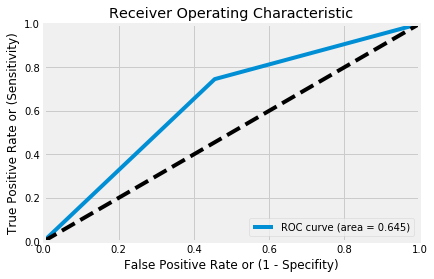

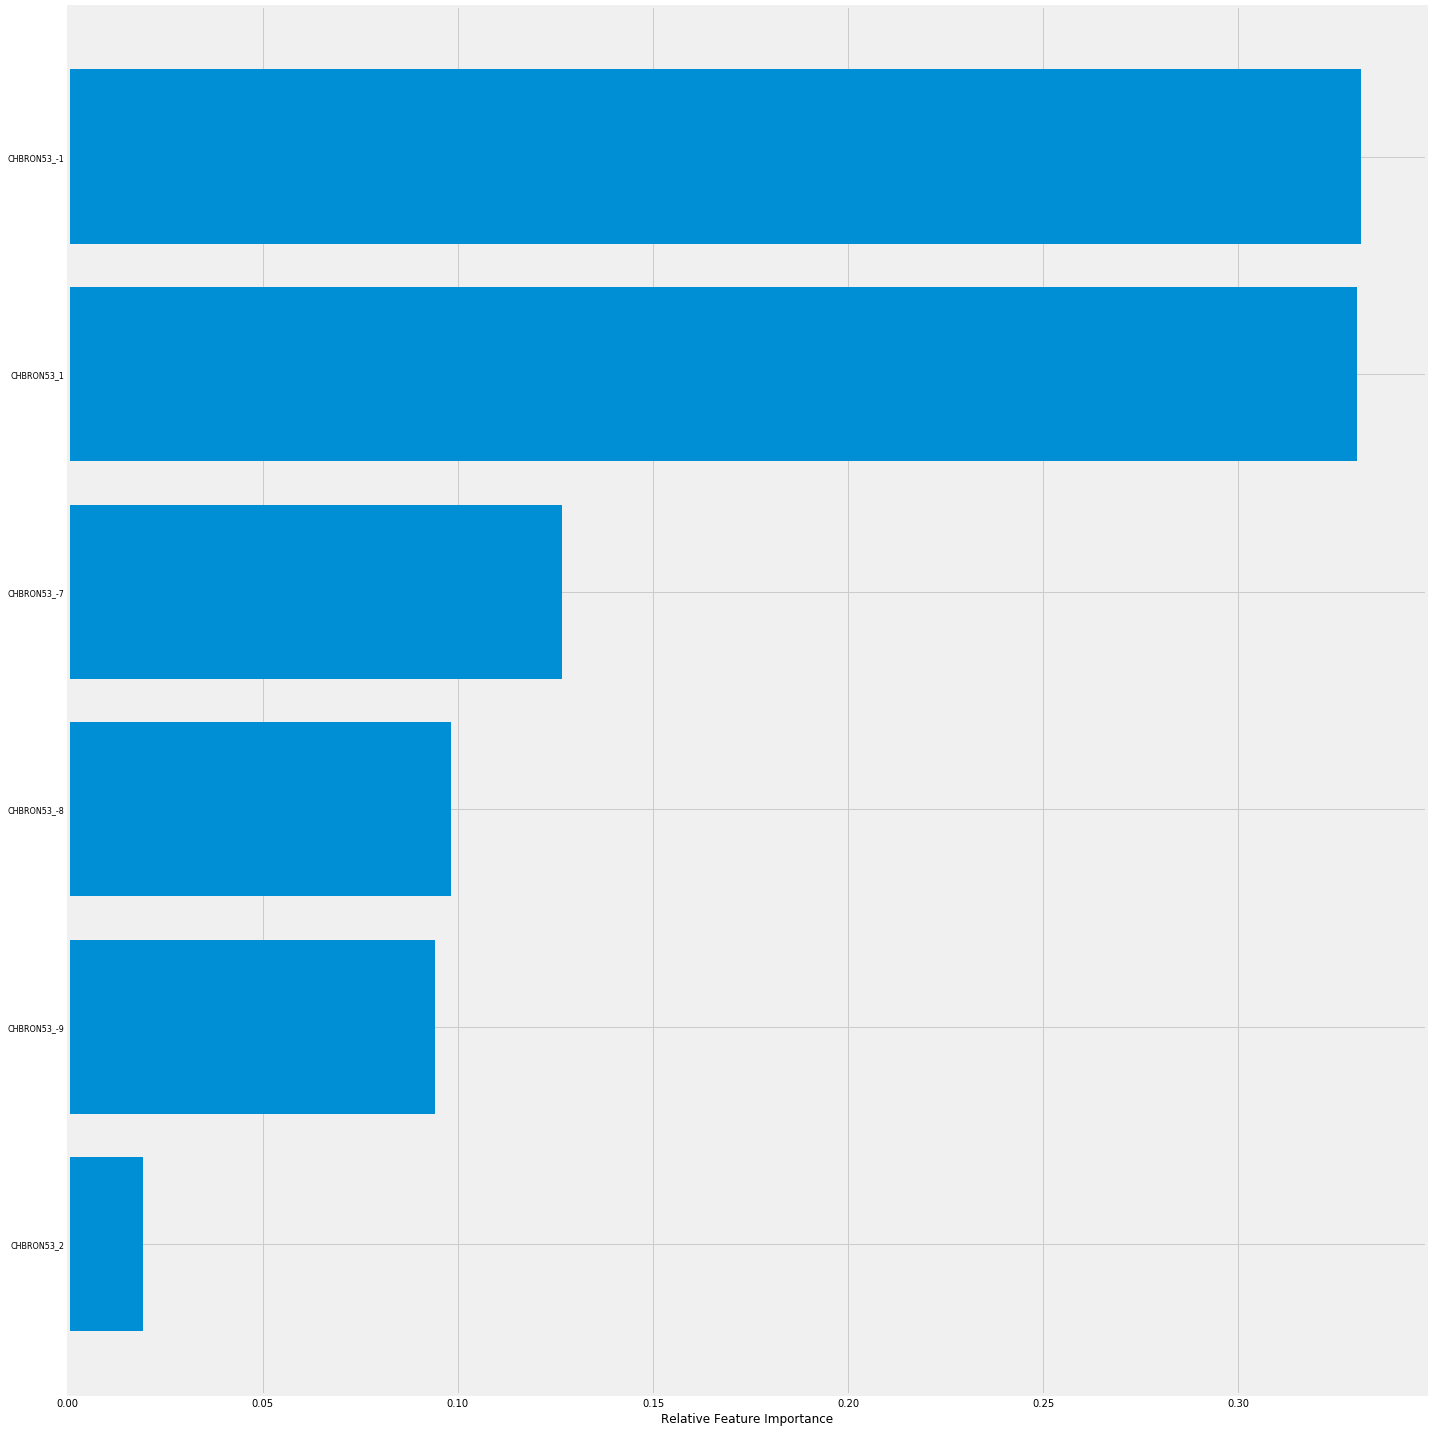

In [24]:
features=['CHBRON53']
play(features)